In [1]:
# Import libraries:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory variables:
repo_dir = os.getcwd()  # Directory of the script
source_data_dir = os.path.join(repo_dir, "analysis-data")
results_dir = os.path.join(repo_dir, 'analysis-results')

# Big teams list:
big_teams = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Chelsea', 'Liverpool', 'Real Madrid', 'Barcelona', 'Atlético Madrid', 'Paris S-G', 'Juventus', 'Milan', 'Inter']

# League ID and name mapping variables:
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'ITA-Serie A']
league_names = ['Premier League', 'La Liga', 'Ligue 1', 'Serie A']
league_names_dict = dict(zip(league_ids, league_names))


# Function that adds the log(market value) column to the data:
def add_log_mkt_val_col(df):
    df['log_mkt_val'] = np.log(df['market_value_in_eur'])
    return df


# Function that adds the "Big Team" dummy variable to the data:
def add_big_team_col(df):
    df['Big Team'] = df['team'].isin(big_teams).astype(int)
    return df


# Function that adds a clean league name column based on league id:
def add_league_name_col(df):
    df['league_name'] = df['league'].map(league_names_dict)
    return df

In [2]:
# Import master file:
raw_df = pd.read_csv(os.path.join(source_data_dir, 'master_file_with_dummies.csv')).drop(columns='Unnamed: 0')

# Add the LN(market value) column:
raw_df = add_log_mkt_val_col(raw_df)

# Add the 'Big Team' column:
raw_df = add_big_team_col(raw_df)

# Add league name, generate dummies, drop all string columns:
raw_df = add_league_name_col(raw_df)
league_dummies_df = pd.get_dummies(raw_df['league_name'], drop_first=True) # one-hot encoding, drop first to create a reference category
master_df = pd.concat([raw_df, league_dummies_df], axis=1)
master_df = master_df.drop(columns=['league_name', 'league', 'season', 'team', 'player_name', 'nationality', 'position'])

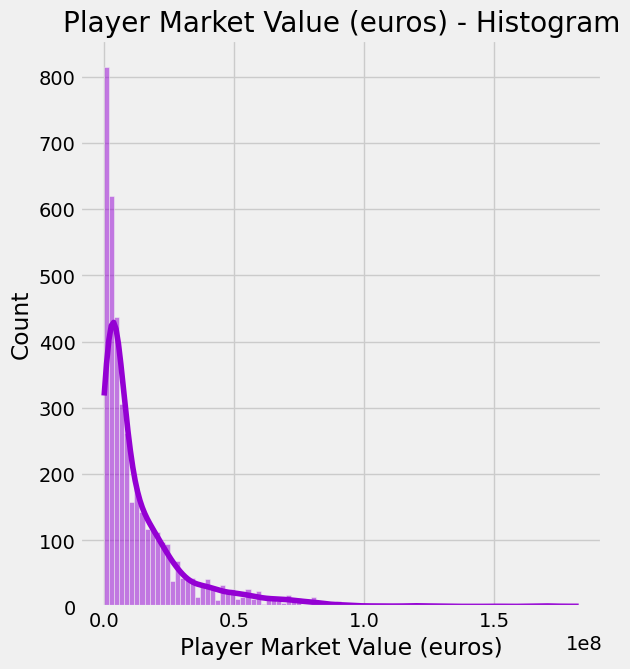

In [9]:
# Generate outcome histogram-KDE plots
# plt.style.use('dark_background')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 7))
sns.histplot(data=master_df, x='market_value_in_eur', kde=True, color='darkviolet')
plt.title('Player Market Value (euros) - Histogram')
plt.xlabel('Player Market Value (euros)')
plt.show()

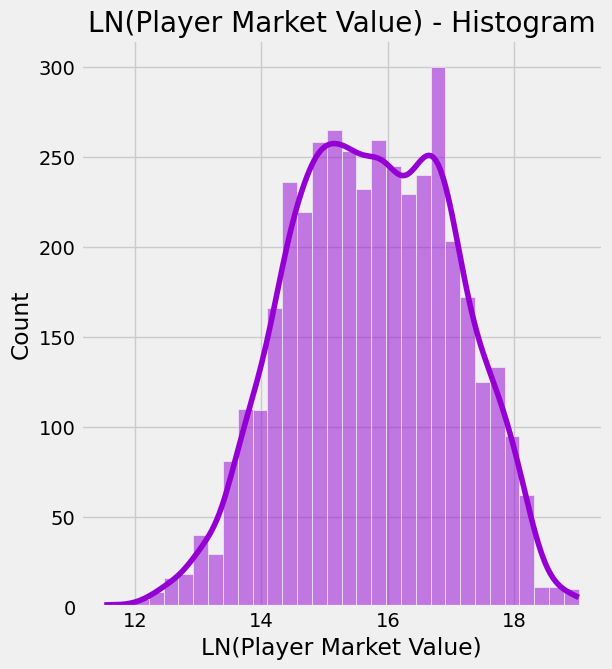

In [10]:
# Generate outcome histogram-KDE plots
# plt.style.use('dark_background')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 7))
sns.histplot(data=master_df, x='log_mkt_val', kde=True, color='darkviolet')
plt.title('LN(Player Market Value) - Histogram')
plt.xlabel('LN(Player Market Value)')
plt.show()